INSTALLING SEABORN

In [1]:
#standard imports
import numpy as np
import pandas as pd
from numpy.random import randn

#import the stats frrom numpy
from scipy import stats

# these are the plotting modules adn libraries we'll use
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
url ='http://en.wikipedia.org/wiki/Histogram'

In [3]:
dataset1 = randn(100)

(array([ 5.,  7., 11., 23., 20., 18.,  5.,  6.,  4.,  1.]),
 array([-2.0969239 , -1.58178063, -1.06663736, -0.55149409, -0.03635081,
         0.47879246,  0.99393573,  1.509079  ,  2.02422228,  2.53936555,
         3.05450882]),
 <a list of 10 Patch objects>)

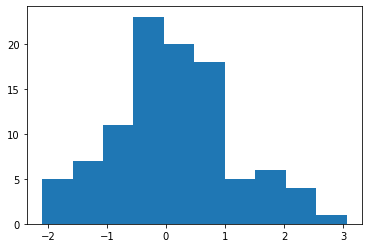

In [4]:
plt.hist(dataset1)

(array([ 3.,  8., 10., 13., 15., 14.,  9.,  2.,  4.,  2.]),
 array([-2.18101656, -1.69476221, -1.20850786, -0.72225352, -0.23599917,
         0.25025518,  0.73650952,  1.22276387,  1.70901822,  2.19527256,
         2.68152691]),
 <a list of 10 Patch objects>)

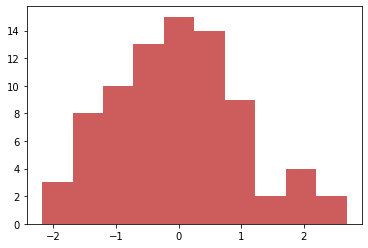

In [5]:
dataset2 = randn(80)

plt.hist(dataset2,color='indianred')

(array([3., 0., 4., 4., 6., 4., 8., 5., 7., 8., 6., 8., 5., 4., 0., 2., 4.,
        0., 0., 2.]),
 array([-2.18101656, -1.93788938, -1.69476221, -1.45163504, -1.20850786,
        -0.96538069, -0.72225352, -0.47912634, -0.23599917,  0.007128  ,
         0.25025518,  0.49338235,  0.73650952,  0.9796367 ,  1.22276387,
         1.46589104,  1.70901822,  1.95214539,  2.19527256,  2.43839974,
         2.68152691]),
 <a list of 20 Patch objects>)

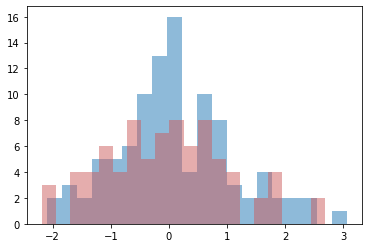

In [7]:
plt.hist(dataset1,alpha=0.5,bins=20)
plt.hist(dataset2,color='indianred',alpha=0.5,bins=20)

In [8]:
data1 = randn(1000)
data2 = randn(1000)

In [9]:
#SNS PLOTS USED IN THIS LECTURE
#sns.jointplot
#sns.rugplot
#sns.kdeplot(kernel density estimation plot)
#sns.distplot(combines kernel density plot and histogram)

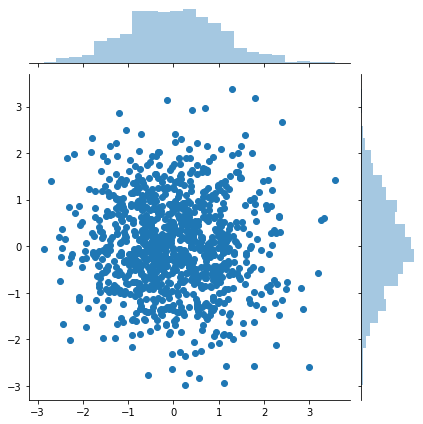

In [10]:
sns.jointplot(data1,data2)

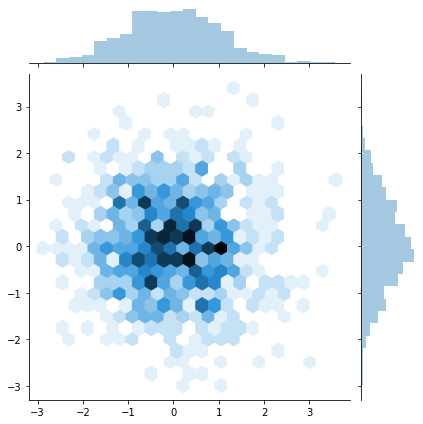

In [11]:
sns.jointplot(data1,data2,kind='hex')

KERNEL DENSITY ESTIMATE PLOTS


In [12]:
dataset = randn(25)

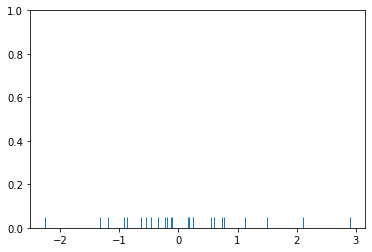

In [13]:
sns.rugplot(dataset)

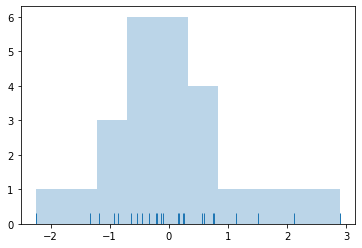

In [14]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

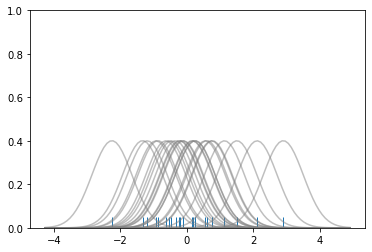

In [15]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

#gaussian basis function formal for bandwidth
bandwidth =((4*dataset.std()**5) / (3*len(dataset))) **0.2

kernel_list = []

for data_point in dataset:
    
    #create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of basis functions')

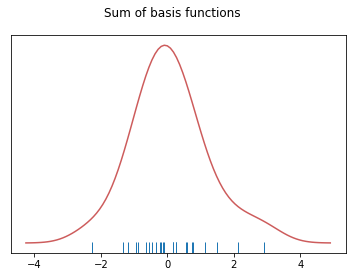

In [16]:
sum_of_kde = np.sum(kernel_list,axis =0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of basis functions')

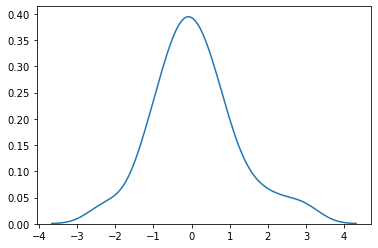

In [17]:
#SIMPLER WAY TO PLOT KERNEL DENSITY USING SEABORN

sns.kdeplot(dataset)

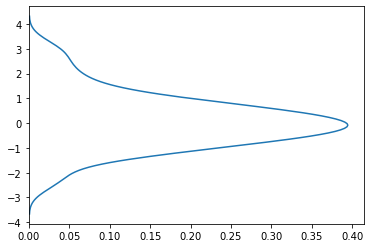

In [18]:
a =sns.kdeplot(dataset, vertical=True)

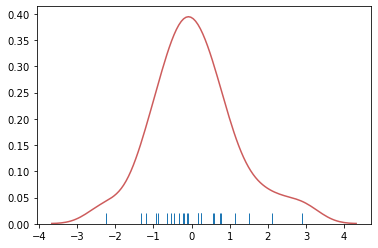

In [19]:
sns.rugplot(dataset)
sns.kdeplot(dataset,color='indianred')

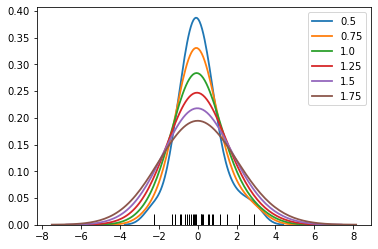

In [20]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

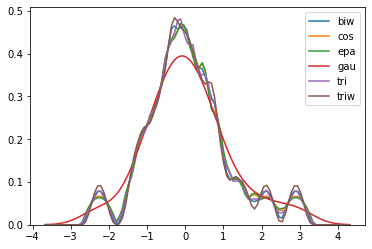

In [21]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

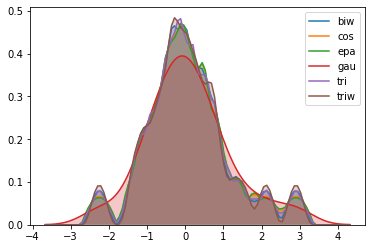

In [22]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern, shade=True)

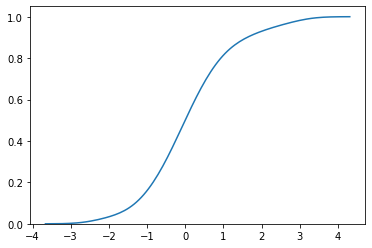

In [23]:
#to get cumulative distribution function
sns.kdeplot(dataset, cumulative=True)

COMBINING PLOTS STYLE

In [24]:
dataset2 = randn(100)

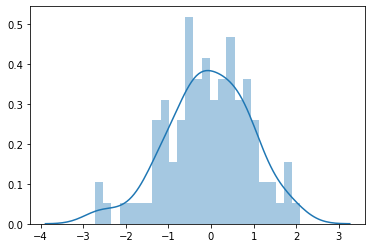

In [25]:
#sns.distplot(combines kernel density plot and histogram)

sns.distplot(dataset2, bins=25)

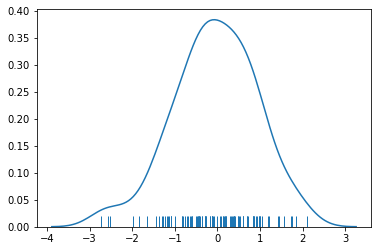

In [26]:
# distplot is also use to plot rug and kernel density but with rug=True 
sns.distplot(dataset2, bins=25, rug=True, hist=False)

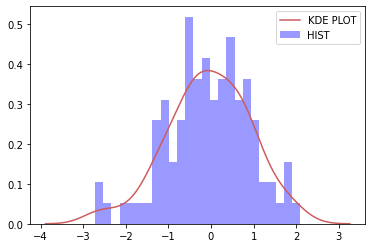

In [27]:
sns.distplot(dataset2, bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':'HIST'})

In [28]:
ser1 = pd.Series(dataset2, name='My_data')

ser1

0    -1.088576
1     0.847418
2     0.136769
3    -0.991007
4    -0.809971
        ...   
95    0.906592
96    1.848323
97   -0.126112
98   -2.565247
99   -1.094122
Name: My_data, Length: 100, dtype: float64

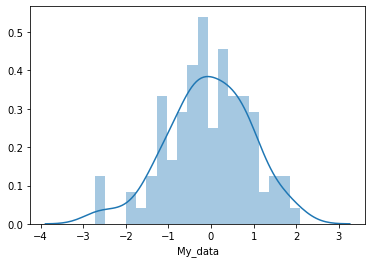

In [29]:
sns.distplot(ser1,bins=20)

In [36]:
data1 = randn(100)
data2 = randn(100)

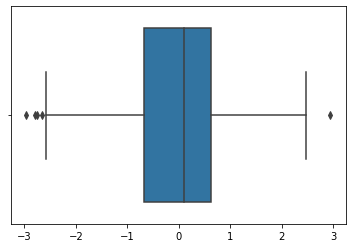

In [37]:
sns.boxplot([data1,data2])

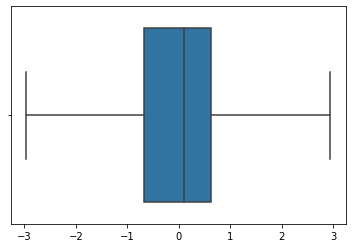

In [38]:
sns.boxplot([data1,data2], whis=np.inf)

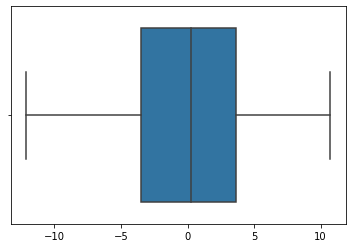

In [39]:
#normal dist
data1 = stats.norm(0,5).rvs(100)

#two gamma dist. concatenated together
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                       -1*stats.gamma(5).rvs(50)])

#box plot both data1 and data2
sns.boxplot([data1,data2],whis = np.inf)

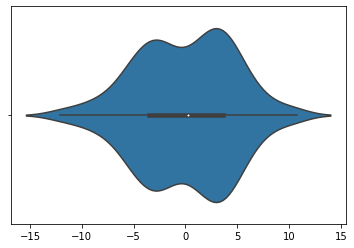

In [40]:
sns.violinplot([data1,data2])

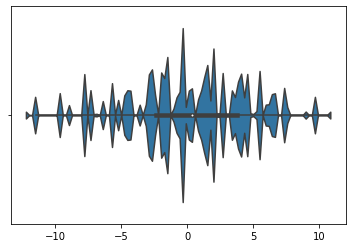

In [41]:
sns.violinplot(data1, bw=0.01)

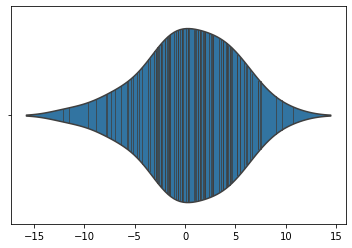

In [43]:
#to turn to rug plot
sns.violinplot(data1,inner='stick')

In [61]:
#MULTIPLE REGRESSION PLOT
tips = pd.read_excel(r'C:\Users\Ife\Desktop\Rasheed doc\tips.xlsx', sheet_name='Sheet1')

In [62]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,female,no,Sunday,dinner,2
1,10.34,1.66,male,no,Sunday,dinner,3
2,21.01,3.50,male,no,Sunday,dinner,3
3,23.68,3.31,male,no,Sunday,dinner,2
4,24.59,3.61,female,no,Sunday,dinner,4


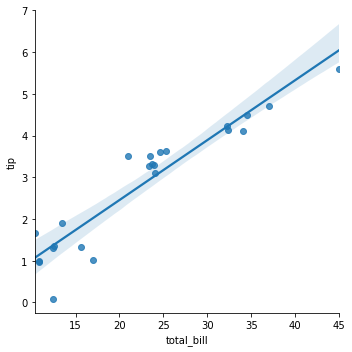

In [63]:
sns.lmplot('total_bill','tip', tips)

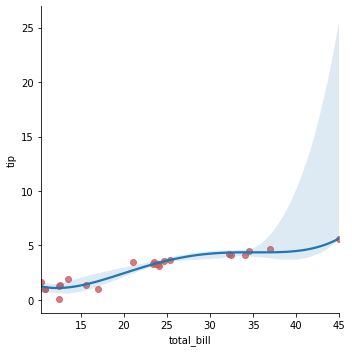

In [71]:
sns.lmplot('total_bill','tip',tips,order=4,
        scatter_kws={'marker':'o','color':'indianred'}
        )

In [72]:
tips['tip_pect']=100*(tips['tip']/tips['total_bill'])

In [74]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,female,no,Sunday,dinner,2,5.944673
1,10.34,1.66,male,no,Sunday,dinner,3,16.054159
2,21.01,3.50,male,no,Sunday,dinner,3,16.658734
3,23.68,3.31,male,no,Sunday,dinner,2,13.978041
4,24.59,3.61,female,no,Sunday,dinner,4,14.680765


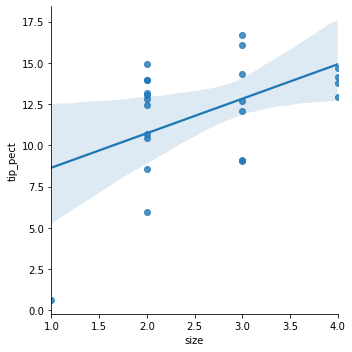

In [76]:
sns.lmplot('size','tip_pect',tips)

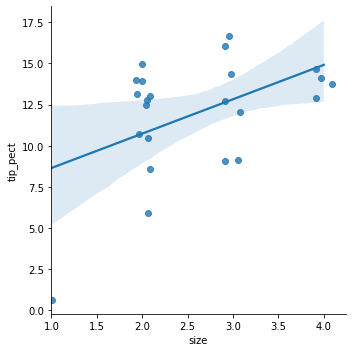

In [77]:
sns.lmplot('size','tip_pect',tips,x_jitter=.1)

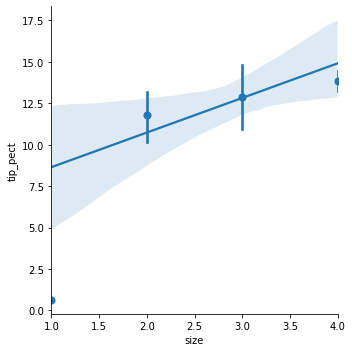

In [79]:
sns.lmplot('size','tip_pect',tips,x_estimator=np.mean)

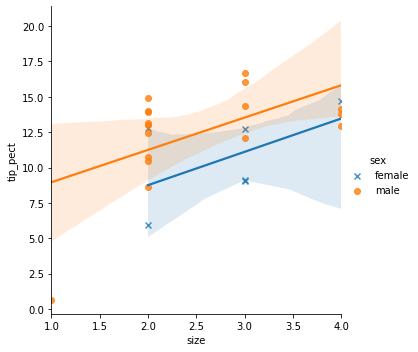

In [83]:
sns.lmplot('size','tip_pect',tips,hue='sex',markers=['x','o'])

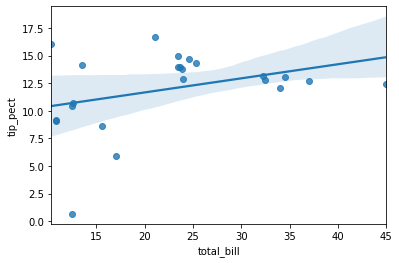

In [84]:
sns.regplot('total_bill','tip_pect',tips)

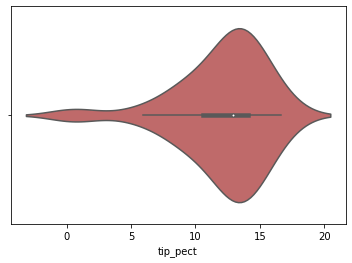

In [89]:

sns.violinplot(tips['tip_pect'],color='indianred')